## The MNIST dataset and build a model using TensorFlow and Keras. 

### Import necessary libraries:

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

### To load the MNIST dataset and print the shapes of the training and test

In [119]:
# Load the MNIST dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
# Print the shapes of the training and test datasets
print("Train:","x=",x_train.shape,"y=",y_train.shape)
print("Test:","x=",x_test.shape,"y=",y_test.shape)

Train: x= (60000, 28, 28) y= (60000,)
Test: x= (10000, 28, 28) y= (10000,)


In [121]:
# Normalize the input data
x_train=x_train.astype('float')/255.
x_test=x_test.astype('float')/255.

### Plot the first 10 images from the training set

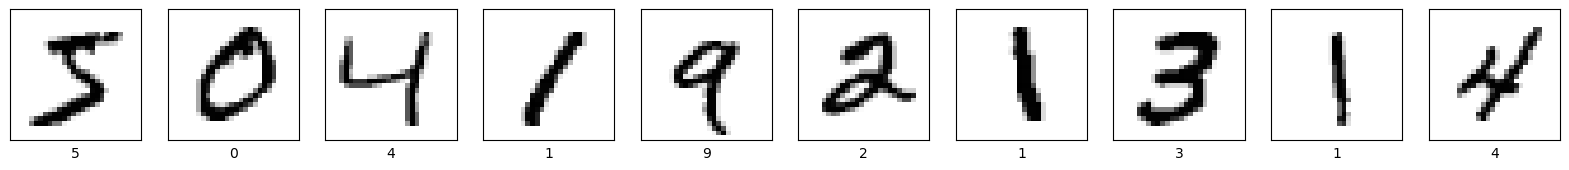

In [77]:
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i],cmap='binary')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

In [79]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

In [130]:
#You have started defining a Convolutional Neural Network (CNN) using Keras. The code you provided sets up the initial layers of the model. To complete the model, you need to add more layers for flattening the output from the convolutional layers and adding dense (fully connected) layers. Then, compile the model, fit it to the training data, and evaluate its performance.

In [81]:
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


In [83]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

This code adds three layers to a neural network: `Flatten()` converts 2D feature maps into a 1D vector; `Dense(64, activation='relu')` adds a fully connected layer with 64 neurons and ReLU activation for non-linearity; `Dense(10, activation='softmax')` outputs probabilities for 10 classes.

In [85]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [87]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

This code sets up the training process for the model, 
optimizing it using the Adam optimizer and evaluating its
accuracy during training and validation.

In [89]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    validation_data=(x_test, y_test)
)

Epoch 1/10


C:\Users\ash\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9002 - loss: 0.3190 - val_accuracy: 0.9842 - val_loss: 0.0443
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9857 - loss: 0.0475 - val_accuracy: 0.9875 - val_loss: 0.0355
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9903 - loss: 0.0319 - val_accuracy: 0.9895 - val_loss: 0.0340
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9931 - loss: 0.0232 - val_accuracy: 0.9882 - val_loss: 0.0321
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9923 - val_loss: 0.0256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9894 - val_loss: 0.0384
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9966 - loss: 0.0104 - val_accuracy: 0.9884 - val_loss: 0.0386
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9976 - loss: 0.00

In [91]:
model.save('my_model_digits.h5')
print("Saved model to disk")

Saved model to disk


In [93]:
from tensorflow.keras.models import load_model
model=load_model('my_model_digits.h5')

This script loads an image, prepares it for input into a pre-trained model, performs the classification, and outputs the predicted digit. Make sure 'sample2.jpg' and 'my_model_digits.h5' are in the correct paths.

In [103]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

def load_image(filename):
    # Load the image in grayscale
    img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

def predict_sample():
    # Load and prepare the image
    img = load_image('sample2.jpg')
    
    # Load the pre-trained model
    model = load_model('my_model_digits.h5')
    
    # Make a prediction
    prediction = model.predict(img)
    digit = np.argmax(prediction, axis=1)
    print(digit[0])

predict_sample()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
5


313/313 - 3s - 11ms/step - accuracy: 0.9907 - loss: 0.0419


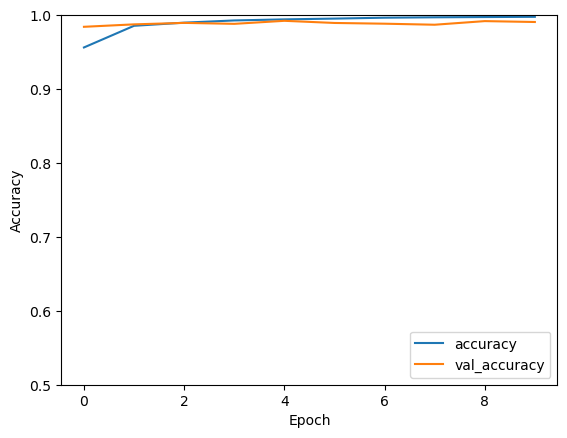

In [105]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)

In [107]:
print(test_acc)

0.9907000064849854


Replace 'sample2.jpg' with your digit image and run the model. It will preprocess the image, load the pre-trained model, and predict the digit class. The model should provide accurate predictions if the image is a digit and the model is trained correctly.